In [69]:
# importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [70]:
#IMPORTING Linear Regression LIBRARIES

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1) DATA LOADING and UNDERSTAND

In [71]:
#Loading the data

bike_rental = pd.read_csv('day.csv')

In [72]:
#checking the data
bike_rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [73]:
bike_rental.shape

(730, 16)

In [74]:
#checking missing values percentage
bike_rental.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

We see that the given dataset does not have any missing values

In [75]:
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [76]:
bike_rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# 2)  DATA PROCESSING

In [77]:
#dropping the instant column as it is an index column

#dropping the 'dteday' variable as it is being represented by 'yr','month' and 'weekday' variables, 

#'casual' and 'registered' as it is being represented by cnt column
bike_rental.drop(['instant','dteday','casual','registered'],1,inplace=True)

In [78]:
#correcting the variable names
bike_rental.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace=True)

In [79]:
bike_rental.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [80]:
#segregating numerical and categorical variables
numvar = ['temp','atemp','humidity','windspeed','count']
catvar = ['season','year','month','holiday','weekday','workingday','weathersit']

# Mapping the categorical columns

In [81]:
#mapping 'season' column values with labels 
bike_rental.season = bike_rental.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_rental.month = bike_rental.month.map({1 :'month_1' , 2 :'month_2', 3:'month_3', 4: 'month_4', 5: 'month_5', 6 : 'month_6', 7: 'month_7', 8 : 'month_8', 9:'month_9', 10: 'month_10', 11 : 'month_11',12 :'month_12'})
bike_rental.weekday = bike_rental.weekday.map ({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'})
bike_rental.weathersit = bike_rental.weathersit.map({1: 'Clear',2: 'Mist + Cloudy',3: 'Light Snow',4: 'Heavy Rain'})

In [82]:
bike_rental.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,month_1,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,month_1,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,month_1,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,month_1,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,month_1,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# 3) DATA VISUALIZATION

# Visualisation of the independent variable against the independent variable

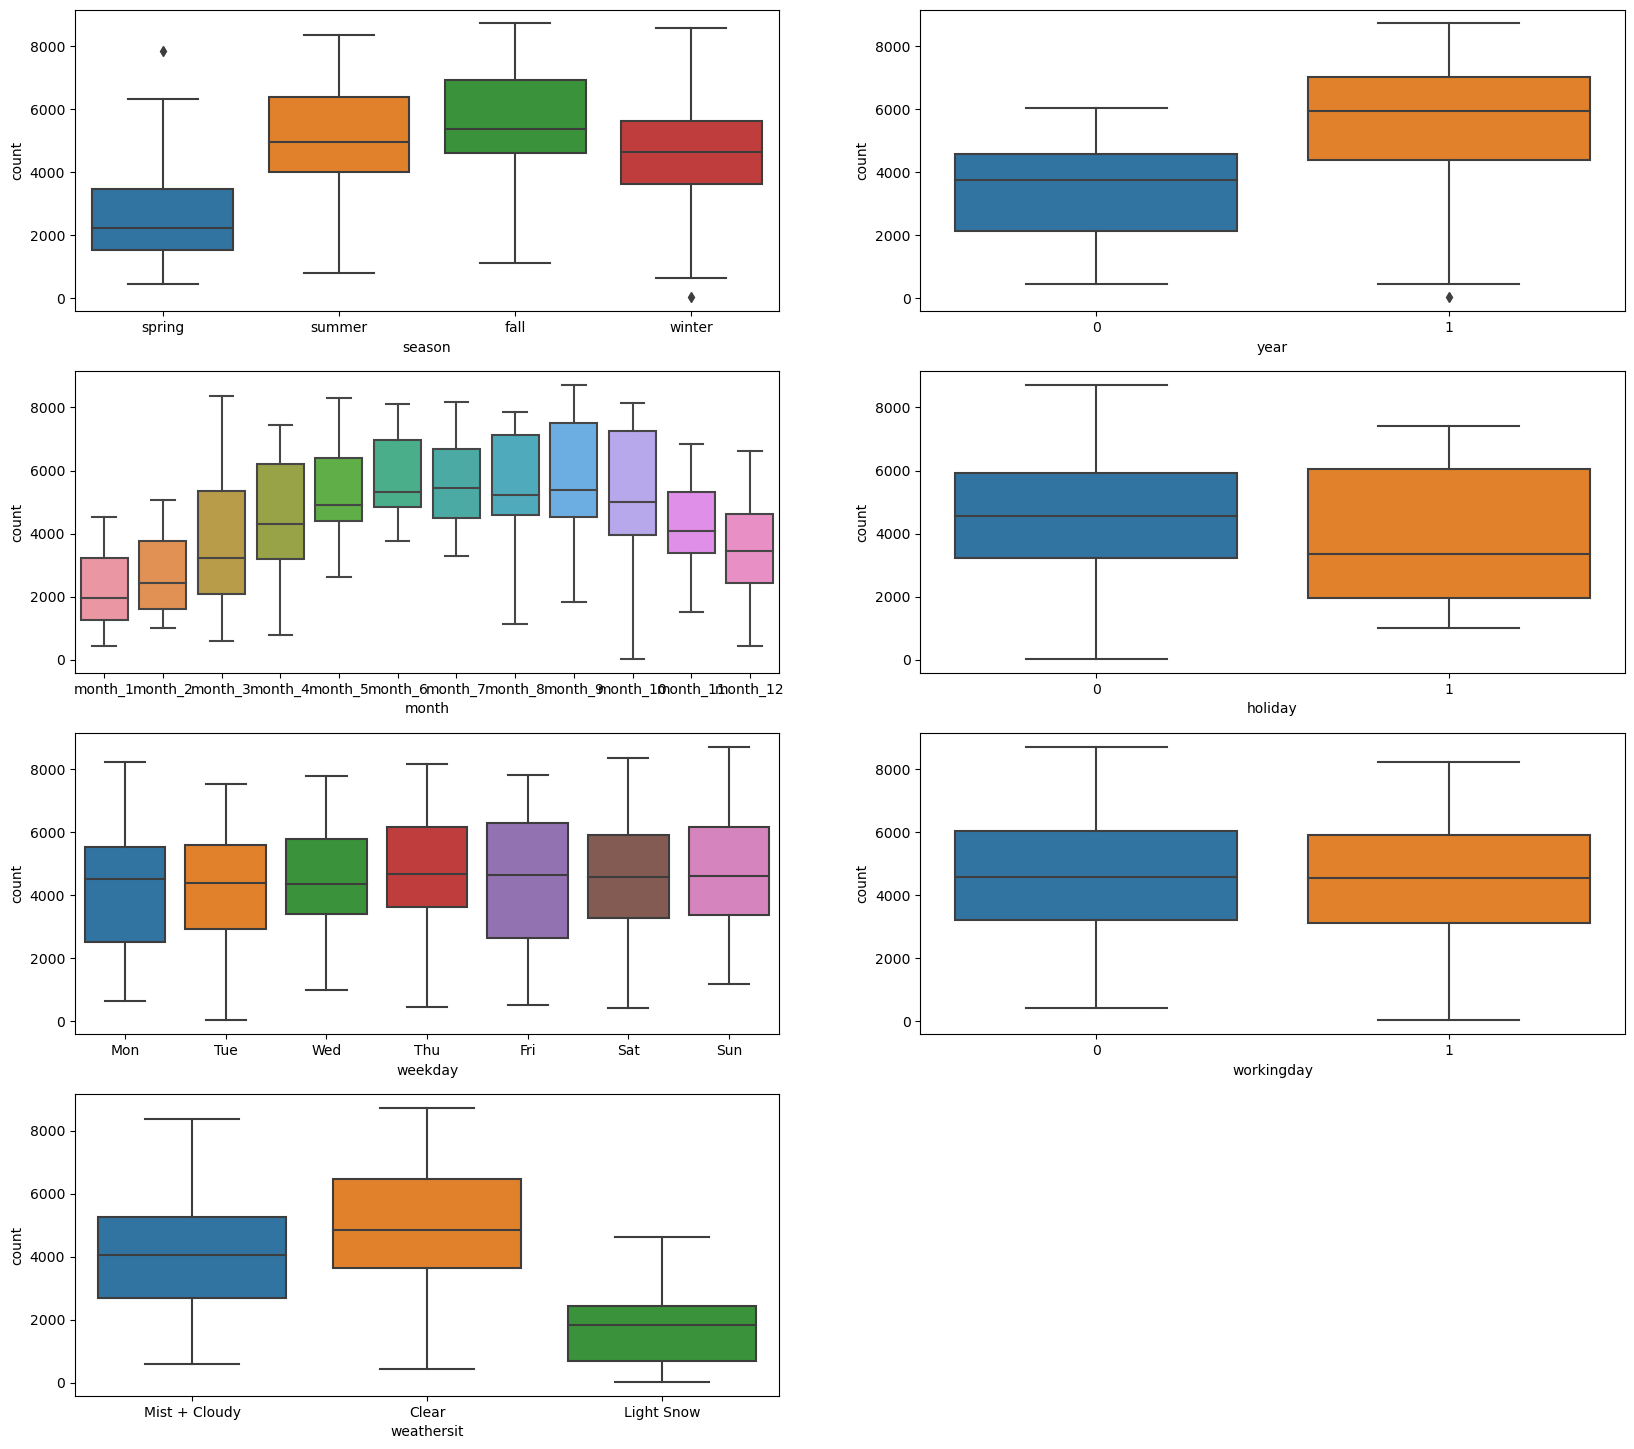

In [83]:
plt.figure(figsize=(20,18))
for i,j in zip (range(1,8),catvar) :
    plt.subplot(4,2,i)
    sns.boxplot(x=j,y='count', data= bike_rental);

                   
                   As seen in the boxplot, we do see much outliers for the given categorical variables

## plotting the categorical variables individually

In [84]:
def plot_columns(var):
    plt.figure(figsize = (8,4))
    sns.barplot(x = var, y = 'count', data =bike_rental, hue ='year')
    plt.legend(labels=['2018','2019'])
    

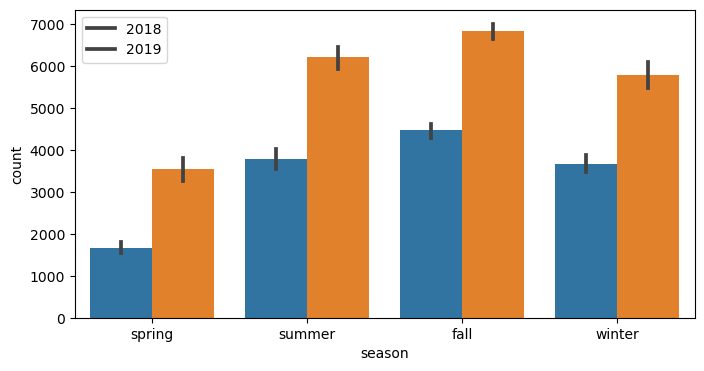

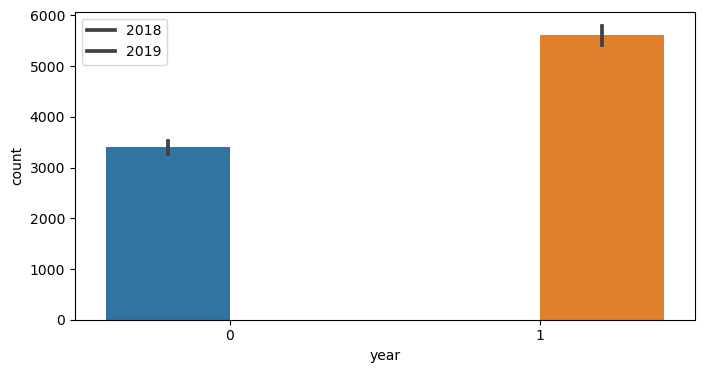

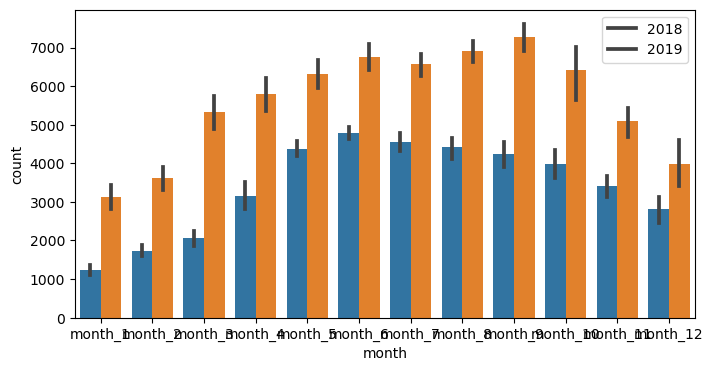

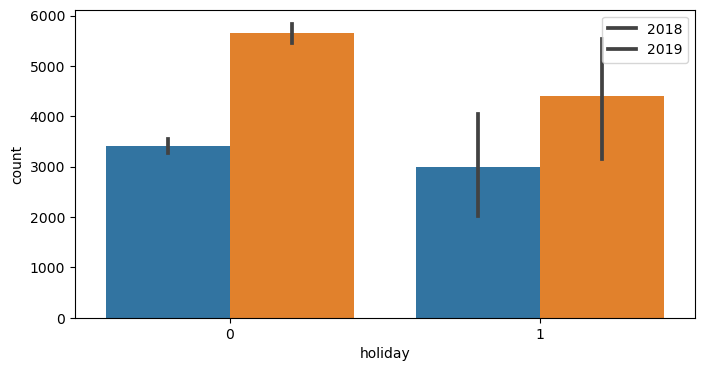

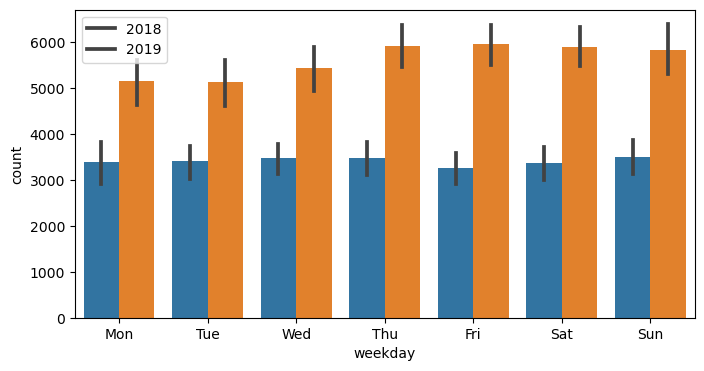

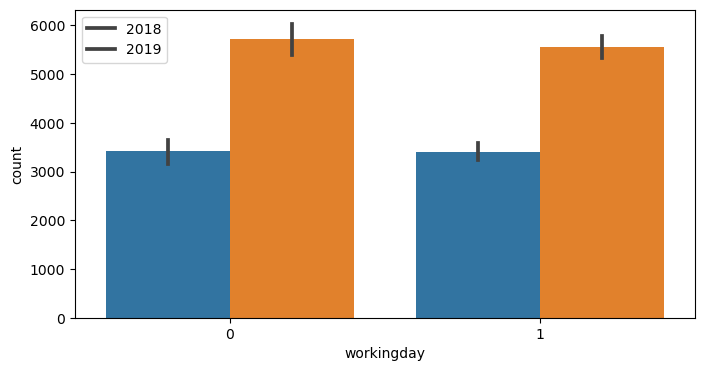

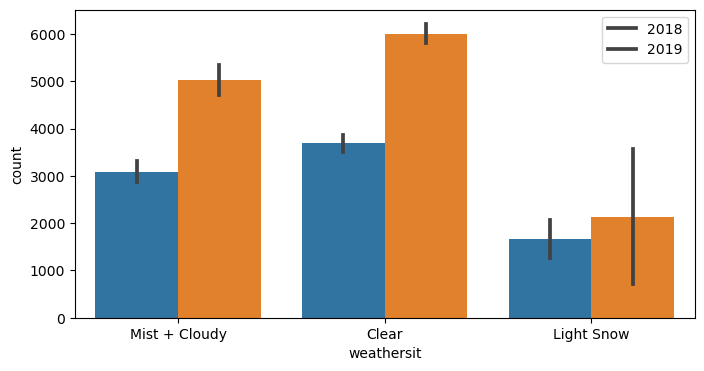

In [85]:
for i in catvar:
    plot_columns(i)

## INSIGHTS

1) In fall season the booking is maximum and the booking for each season has increased drastically in 2019
2) the booking increases from the start of the year and peaks from June to September and starts to decrease
3) When its holiday, the booking seems to be less.
4) Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.
5) Booking seemed to be almost equal either on working day or non-working day.
6) The bookings are more when there is a clear weather which is as expected.
7) Overall, in general, we can see similar pattern of booking 2018 and 2019, but the booking count has increased in 2019, which is a god sign for business.

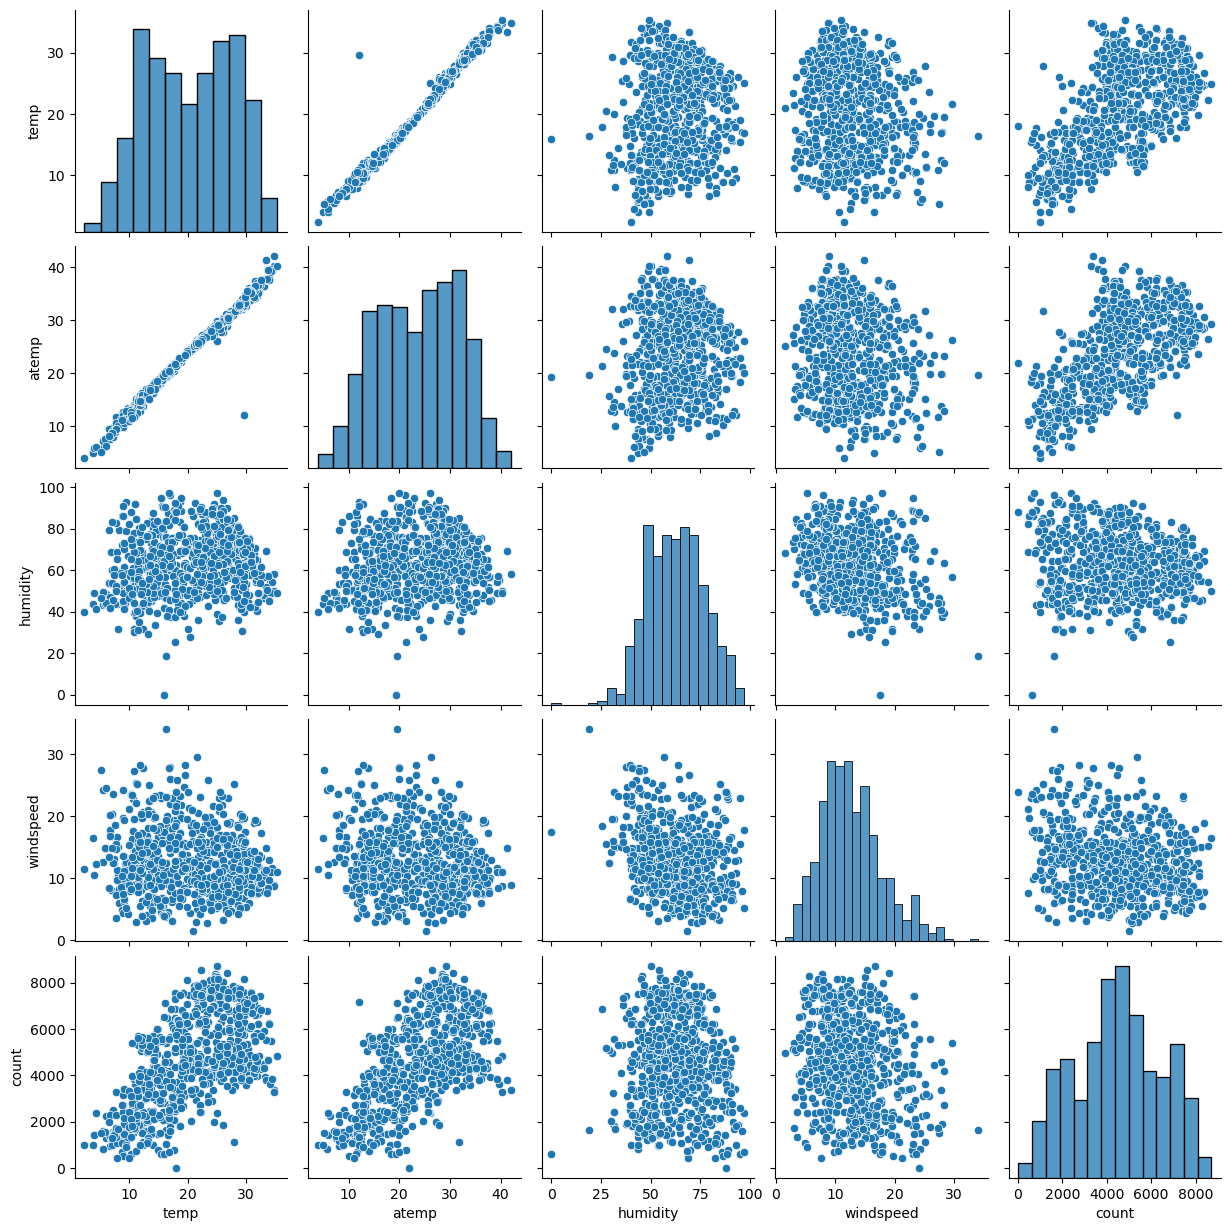

In [86]:
sns.pairplot(bike_rental[numvar]);

# Multivariate Analysis

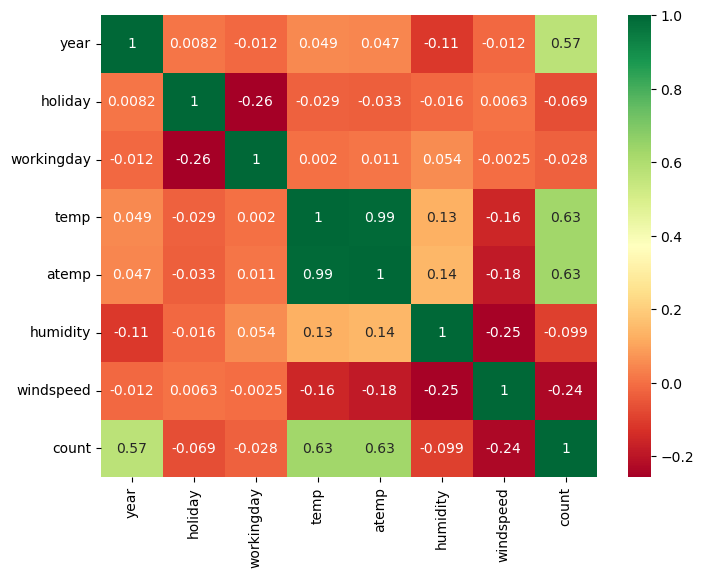

In [87]:
#finding the correlation between the variables 

plt.figure(figsize=(8,6))
sns.heatmap(bike_rental.corr(), annot=True, cmap = 'RdYlGn' );

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables



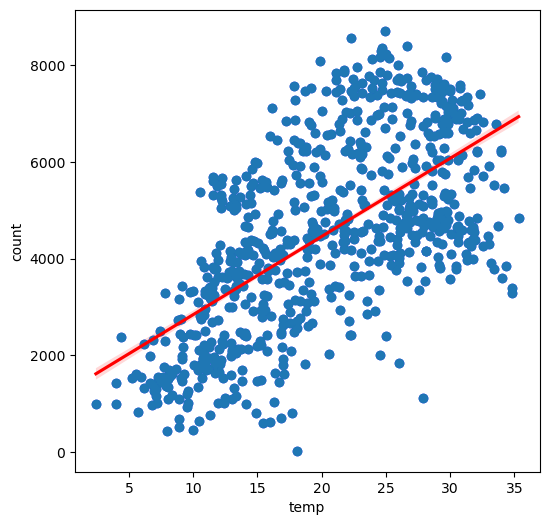

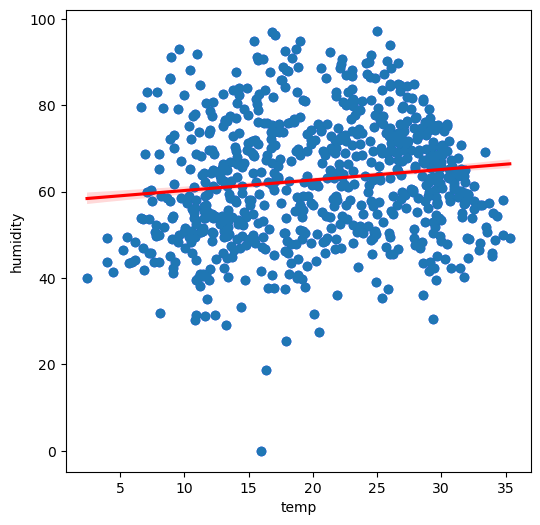

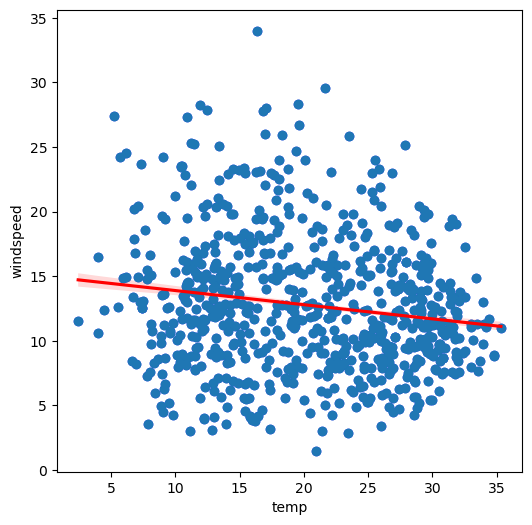

In [88]:
# 'Count' and 'Temp' are highly correlated, 

# Visualizing the correlation to see the trends via Scatter plot.

plt.figure(figsize=(6,6))

sns.regplot(x = 'temp',y = 'count',data= bike_rental , ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.scatter(x = 'temp',y = 'count',data= bike_rental);


plt.figure(figsize=(6,6))
sns.regplot(x = 'temp',y = 'humidity',data= bike_rental , ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.scatter(x = 'temp',y = 'humidity',data= bike_rental);


plt.figure(figsize=(6,6))
sns.regplot(x = 'temp',y = 'windspeed',data= bike_rental , ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.scatter(x = 'temp',y = 'windspeed',data= bike_rental);

Visualization confirms the positive correlation between temp and count.

# 4) DATA PREPARATION

## creating dummy variables for non binary categorical variables

In [89]:
season_df = pd.get_dummies(bike_rental.season, drop_first=True)
month_df = pd.get_dummies(bike_rental.month, drop_first=True)
weekday_df = pd.get_dummies(bike_rental.weekday, drop_first=True)
weathersit_df = pd.get_dummies(bike_rental.weathersit, drop_first=True)

In [90]:
#concatinating the dummy variables to the dataframe

bike_rental = pd.concat([bike_rental,season_df,month_df,weekday_df,weathersit_df], axis=1)

In [91]:
#dropping the original columns from the dataframe
bike_rental.drop(['season','month','weekday','weathersit'],axis=1,inplace=True)

In [92]:
#splitting the dataframe into train_test dataframe

np.random.seed(0)
df_train,df_test = train_test_split(bike_rental, train_size= 0.7, test_size=0.3, random_state=100)

In [93]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,month_8,month_9,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1


In [94]:
#scaling the numerical variables in training data set 

scaler = MinMaxScaler()
df_train[numvar]= scaler.fit_transform(df_train[numvar])

In [95]:
#creating the x and y componenet of the dataframe

y_train = df_train.pop('count')
X_train = df_train


In [96]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,spring,summer,winter,...,month_8,month_9,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [97]:
#Hybrid (automatic and manual) feature selection process

#RFE (Automatic feature selection)

estimator =LinearRegression()
selector = RFE(estimator,n_features_to_select=15)

In [98]:
selector =selector.fit(X_train,y_train)
selector.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
        True,  True])

In [99]:
selected_feature = list(X_train.columns[selector.support_])
selected_feature

['year',
 'holiday',
 'temp',
 'humidity',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'month_10',
 'month_3',
 'month_5',
 'month_8',
 'month_9',
 'Light Snow',
 'Mist + Cloudy']

In [100]:
#Obtaining the dataframe consisting the selected variables

X_train = df_train[selected_feature]
X_train.head()

,year,holiday,temp,humidity,windspeed,spring,summer,winter,month_10,month_3,month_5,month_8,month_9,Light Snow,Mist + Cloudy
653,1,0,0.509887,0.575354,0.300794,0,0,1,1,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1


In [101]:
#X component of the test Dataframe

X_test = df_test[selected_feature]
X_test.head()

,year,holiday,temp,humidity,windspeed,spring,summer,winter,month_10,month_3,month_5,month_8,month_9,Light Snow,Mist + Cloudy
184,0,1,29.793347,63.7917,5.459106,0,0,0,0,0,0,0,0,0,1
535,1,0,32.082500,59.2083,7.625404,0,1,0,0,0,0,0,0,0,0
299,0,0,19.270000,81.2917,13.250121,0,0,1,1,0,0,0,0,0,1
221,0,0,31.433347,42.4167,13.417286,0,0,0,0,0,0,1,0,0,0
152,0,0,29.315000,30.5000,19.583229,0,1,0,0,0,0,0,0,0,0


## Building first linear regression model

In [102]:
# Building first linear regression model

X_train_sm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train,X_train_sm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          2.95e-189
Time:                        16:14:31   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2812      0.036      7.826      0.000       0.211       0.352
year              0.2304      0.008     28.506      0.000       0.215       0.246
holiday          -0.0891      0.025     -3.499      0.001      -0.139      -0.039
temp              0.4847      0.034     14.073      0.000       0.417       0.552
humidity         -0.1784      0.038     -4.708      0.000      -0.253      -0.104
windspeed        -0.1836      0.026     -7.164      0.000      -0.234      -0.133
spring           -0.0436      0.023     -1.898      0.058      -0.089       0.002
summer            0.0716      0.018      3.957      0.000       0.036       0.107
winter            0.1098      0.020      5.458      0.000       0.070       0.149
month_10          0.0437      0.017      2.504      0.013       0.009       0.078
month_3           0.0333      0.015      2.269      0.024       0.004       0.062
month_5           0.0307      0.018      1.717      0.087      -0.004       0.066
month_8           0.0511      0.017      2.931      0.004       0.017       0.085
month_9           0.1209      0.017      7.009      0.000       0.087       0.155
Light Snow       -0.2445      0.026     -9.265      0.000      -0.296      -0.193
Mist + Cloudy    -0.0558      0.010     -5.340      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       74.688   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.962
Skew:                          -0.747   Prob(JB):                     2.52e-41
Kurtosis:                       5.562   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
# defining the VIF function

def VIF_calculation(X):
    vif =pd.DataFrame()
    vif['Features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by ='VIF', ascending= False)
    return vif                  
                

In [104]:
VIF_calculation(X_train)

,Features,VIF
3,humidity,29.50
2,temp,15.39
4,windspeed,4.77
5,spring,4.72
7,winter,4.33
6,summer,3.85
14,Mist + Cloudy,2.29
0,year,2.10
11,month_8,1.80
10,month_5,1.64


In [105]:
#dropping the 'month_5' column as it has high VIF value
X_train.drop('month_5',axis=1,inplace=True)

## Building second linear regression model

In [106]:
#Building second Linear Regression model
X_train_sm = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train,X_train_sm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          9.02e-190
Time:                        16:14:31   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2687      0.035      7.622      0.000       0.199       0.338
year              0.2297      0.008     28.400      0.000       0.214       0.246
holiday          -0.0903      0.025     -3.543      0.000      -0.140      -0.040
temp              0.4952      0.034     14.582      0.000       0.428       0.562
humidity         -0.1702      0.038     -4.519      0.000      -0.244      -0.096
windspeed        -0.1857      0.026     -7.241      0.000      -0.236      -0.135
spring           -0.0366      0.023     -1.618      0.106      -0.081       0.008
summer            0.0851      0.016      5.202      0.000       0.053       0.117
winter            0.1137      0.020      5.675      0.000       0.074       0.153
month_10          0.0421      0.017      2.414      0.016       0.008       0.076
month_3           0.0285      0.014      1.975      0.049       0.000       0.057
month_8           0.0506      0.017      2.897      0.004       0.016       0.085
month_9           0.1204      0.017      6.966      0.000       0.086       0.154
Light Snow       -0.2467      0.026     -9.338      0.000      -0.299      -0.195
Mist + Cloudy    -0.0559      0.010     -5.342      0.000      -0.077      -0.035
==============================================================================
Omnibus:                       72.046   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.620
Skew:                          -0.742   Prob(JB):                     1.47e-37
Kurtosis:                       5.404   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
VIF_calculation(X_train)

,Features,VIF
3,humidity,29.49
2,temp,15.32
5,spring,4.70
4,windspeed,4.69
7,winter,4.33
6,summer,3.26
13,Mist + Cloudy,2.29
0,year,2.09
10,month_8,1.80
8,month_10,1.61


In [108]:
#dropping the 'spring' variable as it has high p value
X_train.drop('spring',axis =1 , inplace=True)

## Building third Linear Regression model

In [109]:
#Building third Linear Regression model
X_train_sm = sm.add_constant(X_train)
lr_3 = sm.OLS(y_train,X_train_sm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          2.26e-190
Time:                        16:14:31   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2324      0.027      8.529      0.000       0.179       0.286
year              0.2286      0.008     28.318      0.000       0.213       0.244
holiday          -0.0920      0.026     -3.606      0.000      -0.142      -0.042
temp              0.5364      0.022     23.849      0.000       0.492       0.581
humidity         -0.1790      0.037     -4.795      0.000      -0.252      -0.106
windspeed        -0.1893      0.026     -7.396      0.000      -0.240      -0.139
summer            0.1049      0.011      9.643      0.000       0.083       0.126
winter            0.1393      0.012     11.321      0.000       0.115       0.164
month_10          0.0383      0.017      2.212      0.027       0.004       0.072
month_3           0.0238      0.014      1.681      0.093      -0.004       0.052
month_8           0.0608      0.016      3.723      0.000       0.029       0.093
month_9           0.1296      0.016      7.927      0.000       0.097       0.162
Light Snow       -0.2418      0.026     -9.199      0.000      -0.293      -0.190
Mist + Cloudy    -0.0548      0.010     -5.233      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       64.908   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.567
Skew:                          -0.694   Prob(JB):                     6.68e-32
Kurtosis:                       5.198   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
VIF_calculation(X_train)

,Features,VIF
3,humidity,14.75
2,temp,10.01
4,windspeed,3.69
6,winter,2.34
12,Mist + Cloudy,2.14
0,year,2.02
5,summer,1.83
7,month_10,1.61
9,month_8,1.61
10,month_9,1.34


In [111]:
#dropping the month_3 for high p value
X_train.drop('month_3', axis=1,inplace=True)

## Building forth Linear Regression model

In [112]:
#Building forth Linear Regression model
X_train_sm=sm.add_constant(X_train)
lr_4 = sm.OLS(y_train,X_train_sm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          6.02e-191
Time:                        16:14:31   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2390      0.027      8.848      0.000       0.186       0.292
year              0.2288      0.008     28.291      0.000       0.213       0.245
holiday          -0.0945      0.026     -3.702      0.000      -0.145      -0.044
temp              0.5308      0.022     23.821      0.000       0.487       0.575
humidity         -0.1803      0.037     -4.823      0.000      -0.254      -0.107
windspeed        -0.1868      0.026     -7.297      0.000      -0.237      -0.136
summer            0.1048      0.011      9.620      0.000       0.083       0.126
winter            0.1353      0.012     11.189      0.000       0.112       0.159
month_10          0.0386      0.017      2.226      0.026       0.005       0.073
month_8           0.0588      0.016      3.604      0.000       0.027       0.091
month_9           0.1280      0.016      7.829      0.000       0.096       0.160
Light Snow       -0.2401      0.026     -9.125      0.000      -0.292      -0.188
Mist + Cloudy    -0.0546      0.010     -5.210      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       64.556   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.845
Skew:                          -0.670   Prob(JB):                     1.06e-33
Kurtosis:                       5.313   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
VIF_calculation(X_train)

,Features,VIF
3,humidity,14.41
2,temp,9.88
4,windspeed,3.59
6,winter,2.27
11,Mist + Cloudy,2.13
0,year,2.02
5,summer,1.83
7,month_10,1.61
8,month_8,1.60
9,month_9,1.34


In [114]:
#dropping the 'humidity' variable due to hifh VIF value
X_train.drop('humidity', axis=1, inplace=True)

## Building fifth Linear Regression model

In [115]:
#Building fifth Linear Regression model
X_train_sm=sm.add_constant(X_train)
lr_5 = sm.OLS(y_train,X_train_sm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          3.21e-187
Time:                        16:14:31   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1355      0.017      8.079      0.000       0.103       0.168
year              0.2328      0.008     28.309      0.000       0.217       0.249
holiday          -0.0959      0.026     -3.679      0.000      -0.147      -0.045
temp              0.5091      0.022     22.823      0.000       0.465       0.553
windspeed        -0.1519      0.025     -6.053      0.000      -0.201      -0.103
summer            0.1015      0.011      9.136      0.000       0.080       0.123
winter            0.1266      0.012     10.362      0.000       0.103       0.151
month_10          0.0342      0.018      1.931      0.054      -0.001       0.069
month_8           0.0572      0.017      3.431      0.001       0.024       0.090
month_9           0.1211      0.017      7.278      0.000       0.088       0.154
Light Snow       -0.2883      0.025    -11.587      0.000      -0.337      -0.239
Mist + Cloudy    -0.0834      0.009     -9.463      0.000      -0.101      -0.066
==============================================================================
Omnibus:                       62.884   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.666
Skew:                          -0.659   Prob(JB):                     2.34e-32
Kurtosis:                       5.263   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
VIF_calculation(X_train)

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,year,2.00
5,winter,1.95
4,summer,1.82
6,month_10,1.60
7,month_8,1.59
10,Mist + Cloudy,1.49
8,month_9,1.34
9,Light Snow,1.09


In [117]:
#dropping the 'month_10' variable due to hifh P value
X_train.drop('month_10', axis=1, inplace=True)

## Building sixth Linear Regression model

In [118]:
#Building sixth Linear Regression model
X_train_sm=sm.add_constant(X_train)
lr_6=sm.OLS(y_train,X_train_sm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          1.26e-187
Time:                        16:14:31   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1312      0.017      7.871      0.000       0.098       0.164
year              0.2325      0.008     28.202      0.000       0.216       0.249
holiday          -0.0971      0.026     -3.715      0.000      -0.148      -0.046
temp              0.5174      0.022     23.564      0.000       0.474       0.560
windspeed        -0.1497      0.025     -5.956      0.000      -0.199      -0.100
summer            0.1000      0.011      8.995      0.000       0.078       0.122
winter            0.1383      0.011     13.003      0.000       0.117       0.159
month_8           0.0542      0.017      3.253      0.001       0.021       0.087
month_9           0.1162      0.016      7.045      0.000       0.084       0.149
Light Snow       -0.2828      0.025    -11.411      0.000      -0.332      -0.234
Mist + Cloudy    -0.0825      0.009     -9.354      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       55.419   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.468
Skew:                          -0.605   Prob(JB):                     6.93e-27
Kurtosis:                       5.050   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
VIF_calculation(X_train)

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,year,2.00
4,summer,1.81
6,month_8,1.58
5,winter,1.49
9,Mist + Cloudy,1.48
7,month_9,1.31
8,Light Snow,1.08
1,holiday,1.04


In [120]:
#renaming the month_8, and month_9 to actual names

X_train.rename(columns={'month_8':'Aug','month_9':'Sept'}, inplace=True)

# Predictin the Y-Train values

In [121]:
#predicting the y values of training dataset

y_train_pred = lr_6.predict(X_train_sm)

In [122]:
y_train_pred.head()

653    0.720829
576    0.745833
426    0.471839
728    0.391244
482    0.557650
dtype: float64

# Testing the LR model on test data

In [123]:
#scaling the test data

df_test[numvar] = scaler.transform(df_test[numvar])

In [124]:
y_test = df_test.pop('count')
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: count, dtype: float64

In [125]:
X_test = df_test

#renaming the month_8, and month_9 to actual names

X_test.rename(columns={'month_8':'Aug','month_9':'Sept'}, inplace=True)

#inputting only the required variables that are determined in the LR model building
LR_var= list(X_train.columns)
X_test = X_test[LR_var]
X_test.head()

,year,holiday,temp,windspeed,summer,winter,Aug,Sept,Light Snow,Mist + Cloudy
184,0,1,0.831783,0.084219,0,0,0,0,0,1
535,1,0,0.901354,0.153728,1,0,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,0,0,1
221,0,0,0.881625,0.339570,0,0,1,0,0,0
152,0,0,0.817246,0.537414,1,0,0,0,0,0


In [126]:
# adding constant to the dataframe

X_test_sm = sm.add_constant(X_test)

In [127]:
# predicting the dependent variable values

y_test_pred = lr_6.predict(X_test_sm)
y_test_pred

184    0.369321
535    0.907009
299    0.401878
221    0.590679
152    0.573554
         ...   
400    0.371413
702    0.728268
127    0.523281
640    0.797479
72     0.272317
Length: 219, dtype: float64

# Checking Assumptions

## Homoscedasticity

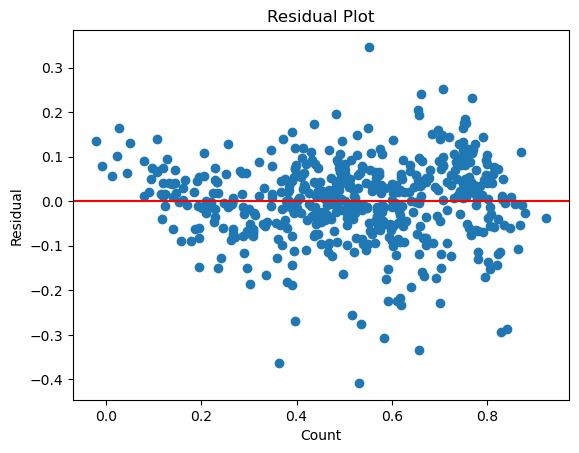

In [128]:
y_train_pred = lr_6.predict(X_train_sm)
residual = y_train - y_train_pred
plt.scatter(y_train_pred, residual)
plt.axhline(0, color = 'red')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

We see that the variable is spread evenly with one or two being away from the group and also there are no visible patterns in the error terms as well

# Residual Analysis

Text(0.5, 1.0, 'Error Terms')

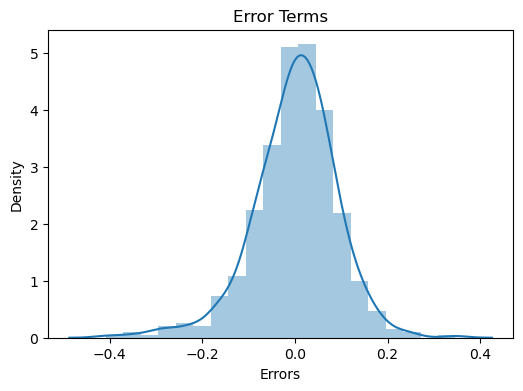

In [129]:
#plotting the error terms

plt.figure(figsize=(6,4))
sns.distplot((y_train - y_train_pred),bins =20);
plt.xlabel('Errors')
plt.title('Error Terms')

As we can see the errors/residuals are in normal distribution, hence our assumption of normal distribution of the errors is correct

Text(0, 0.5, 'y_pred')

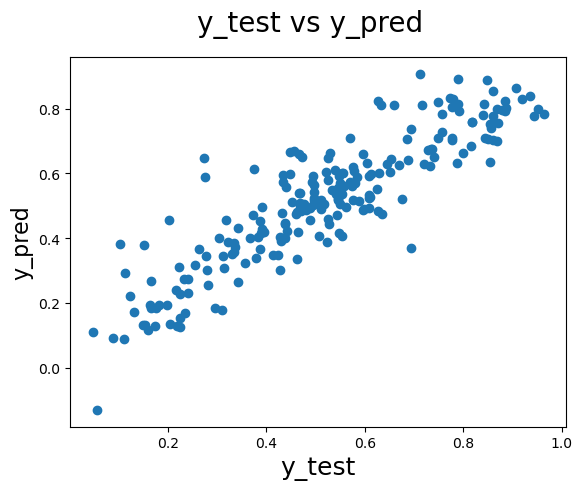

In [130]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred);
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)



We can see the linearity between the actual and predicted values

# Durbin-Watson test to detect autocorrelation

In [131]:
residuals_values =lr_6.resid
test = sm.stats.stattools.durbin_watson(residuals_values)

print('Durbin-Watson Test :',test,'\n')
if test<1.5:
    print('positive autocorrelation may be present')
elif test >2.5:
    print('negative autocorrelation may be present')
else:
    print('No significant autocorrelation has been detected')

Durbin-Watson Test : 2.050620095461341 

No significant autocorrelation has been detected


# Comparing the R-Square values of train and test dataset

In [132]:
print('The R-square value for the training data set ')
print('R-Square Training :', r2_score(y_true=y_train,y_pred=y_train_pred),'\n')

print('The R-square value for the Test data set ')
print('R-Square Testing :', r2_score(y_true=y_test,y_pred=y_test_pred))

The R-square value for the training data set 
R-Square Training : 0.8343511499404235 

The R-square value for the Test data set 
R-Square Testing : 0.7931434526028904


In [133]:
round(lr_6.params,2)


const            0.13
year             0.23
holiday         -0.10
temp             0.52
windspeed       -0.15
summer           0.10
winter           0.14
month_8          0.05
month_9          0.12
Light Snow      -0.28
Mist + Cloudy   -0.08
dtype: float64

# Observations and Recommendations

1) we see that the independent variables : holiday, windspeed, Light Snow and Mist + Cloudy will negatively affect the count variable.
    
2) And the other independent variables : year, temp, summer, winter, August , September will positively affect the Count varibale. 
    
3) The dependent variable Temp has the highest effect on the target variable.

4) Company should focus on expanding business during September and in spring season.

5) Based on the given data, the business is expected to growth significantly in the upcoming years

6) There would be less bookings during Light Snow or Rain, which could be utilised for bike serving as it's affect on business would be less.